In [1]:
from flows import NVPFlow, DFlow, ResFlow, BNFlow, phase, Normal, Linear
from flows.config import floatX
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(1234)

X = np.random.normal(size=[10,3]).astype(floatX)
X[:,0] = (X[:,0] + X[:,1])/2
X[:,2] = (- X[:,0] - X[:,1] + X[:,2])/3
ystd = 0.5
y = 2*X[:,0] + X[:,1] + 0.5*X[:,2] + 3 + np.random.normal(size=10)*ystd

In [3]:
y.dtype

dtype('float64')

In [5]:
dim = 4
# conf = [[NVPFlow(dim, 'nvp{}'.format(i)),
#         ResFlow(dim, 'res{}'.format(i))] for i in range(16)]
# conf = sum(conf, [])

conf = [Linear(dim)]

appr = DFlow(conf)

In [6]:
coefs = appr.output[0]

observ_d = Normal(dim=None, sigma=ystd)

eps = y - X[:,0]*coefs[0] - X[:,1]*coefs[1] - X[:,2]*coefs[2]- coefs[3]

logl = observ_d.logdens(eps, full_reduce=False)

In [7]:
logl

<tf.Tensor 'Sum_1:0' shape=(10,) dtype=float64>

In [8]:
prior = Normal(dim=None, sigma=10).logdens(coefs)

In [9]:
prior

<tf.Tensor 'Sum_2:0' shape=() dtype=float64>

In [10]:
gain = tf.reduce_mean(logl) + (prior - appr.logdens)/tf.cast(logl.shape[0], floatX)

In [11]:
logl

<tf.Tensor 'Sum_1:0' shape=(10,) dtype=float64>

In [12]:
appr.logdens

<tf.Tensor 'sub_1:0' shape=(1,) dtype=float64>

In [13]:
opt = tf.train.GradientDescentOptimizer(0.001).minimize(-gain)

In [14]:
sess = tf.InteractiveSession()

In [15]:
tf.global_variables_initializer().run()

In [16]:
for _ in range(10):
    for _ in range(5000):
        v, _ = sess.run([gain, opt],{phase: True})
    print(v[0])

-1.7838127289569392
-1.657403048753495
-1.5577749541144295
-1.532622998086068
-1.481613791186685
-1.538914698296103
-1.3248381705837662
-1.4162861421883648
-1.431995689265529
-1.404416148435887


In [17]:
samples = []
for _ in range(3000):
    samples.append(coefs.eval({phase: False}))
samples = np.array(samples)

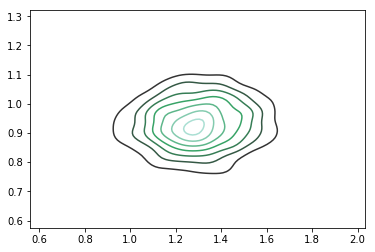

In [20]:
sns.kdeplot(samples[:,0], samples[:,1])
plt.show()

In [19]:
samples.mean(axis=0)

array([ 1.29169134,  0.93138607, -0.0181895 ,  3.29273061])

In [ ]:
tf.variable_scope()